In [1]:
import os
from pathlib import Path

base_dir = Path(os.getcwd()).parent

In [2]:
from transformers import AutoTokenizer
from src.utils.config_loader import load_config
from src.data.preprocessing import create_df
from src.data.dataset import Dataset

config = load_config(base_dir / 'model_params.yaml')

tokenizer = AutoTokenizer.from_pretrained(config['model']['model_name'])

data_df = create_df(base_dir / 'data/norne/ud/nob/no_bokmaal-ud-dev.conllu')

data_df

,words,labels
0,"[Dommer, Finn, Eilertsen, avstår, ,, selvfølge...","[O, B-PER, I-PER, O, O, O, O, O, O, O, O, O, O..."
1,"[Dommeren, lar, gjerningsbeskrivelsen, tale, f...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"[Den, ene, av, de, to, meddommere, ,, Espen, T...","[O, O, O, O, O, O, O, B-PER, I-PER, O, O, O, O..."
3,"[Dette, uaktet, at, også, han, selv, har, unde...","[O, O, O, O, O, O, O, O, O, O]"
4,"[Allerede, søndag, 11., oktober, ser, vi, i, A...","[O, O, O, O, O, O, O, B-PROD, B-PER, I-PER, O,..."
...,...,...
2405,"[Riggen, skal, stå, på, pilarer, ,, halvannen,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2406,"[Stasjonen, består, av, tre, spesialkonstruert...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2407,"[Den, har, plass, til, seks, forskere, ,, og, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2408,"[Fire, vindmøller, sørger, for, strøm, .]","[O, O, O, O, O, O]"


In [3]:
import pandas as pd
import numpy as np

tokenized_lengths = []

for sentence in data_df['words']:  
    length = len(
        tokenizer.encode(
        sentence, 
        is_split_into_words=True, 
        add_special_tokens=True
        )
    )
    tokenized_lengths.append(length)

p_95 = int(np.percentile(tokenized_lengths, 95)) # 95th percentile

p_95

42

In [4]:
df = pd.DataFrame(tokenized_lengths)

df.describe()

,0
count,2410.000000
mean,19.297095
std,11.361147
min,3.000000
25%,11.000000
50%,17.000000
75%,25.000000
max,102.000000


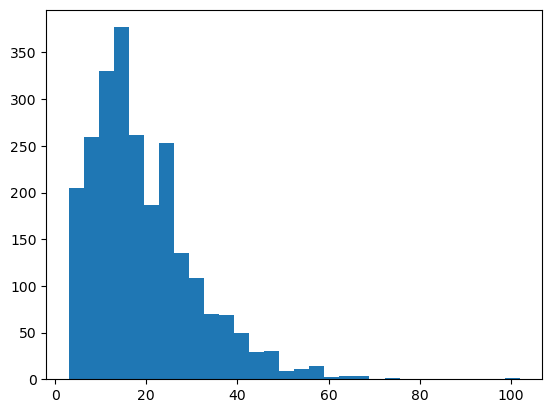

In [5]:
import matplotlib.pyplot as plt

plt.hist(df, bins=30)
plt.show()

In [6]:
# The distribution of entities

entity_counts = pd.Series([label for sublist in data_df['labels'] for label in sublist]).value_counts()

entity_counts

O            33992
B-PER          611
B-ORG          404
I-PER          309
B-GPE_LOC      259
B-PROD         162
I-PROD         154
B-LOC          109
I-ORG           85
B-DRV           79
I-GPE_LOC       66
B-GPE_ORG       55
I-DRV           35
I-LOC           34
B-EVT            9
I-EVT            4
I-GPE_ORG        2
Name: count, dtype: int64